## **Lectura 3: Grafos**

Para empezar, establezcamos qué es un grafo. Un grafo representa las relaciones (aristas, arcos) entre un conjunto de entidades (nodos, vértices).

Por definición, un `Graph` es una colección de nodos (vértices) junto con pares identificados de nodos (llamados aristas, enlaces, etc.).  

En NetworkX, los nodos pueden ser cualquier objeto [hashable](https://docs.python.org/3/glossary.html#term-hashable), por ejemplo, una cadena de texto, una imagen, un objeto XML,otro Graph, un objeto nodo personalizado, etc.


![](../Images/grafo.png)

## **Formalmente**

Un grafo $G$ es una pareja ordenada $(V,E)$ donde $V$ es un conjunto finito y no vacío de vértices y $E$ es un conjunto de pares no ordenados de vértices, llamados aristas.

###  Ejemplo

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/1200px-6n-graf.svg.png" width="200">


### Algunos comandos básicos en Networkx

#### 1. Creación de un grafo
Para empezar, necesitamos importar la librería y crear un objeto de grafo (no dirigido en este caso).


In [ ]:
import networkx as nx

G = nx.Graph()

#### 2. Adición de nodos

**Nodo individual:**


In [55]:
G.add_node('A')

**Nodos múltiples desde una lista:**


In [56]:
nodes = ['B', 'C', 'D']
G.add_nodes_from(nodes)

In [60]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 'A', 'B', 'C', 'D'))

#### 3. Adición de aristas

**Arista individual:**


In [57]:
G.add_edge('A', 'B')


**Aristas múltiples desde una lista:**


In [61]:
edges = [('B', 'C'), ('C', 'D')]
G.add_edges_from(edges)
G.edges()

EdgeView([(0, 1), (0, 19), (0, 10), (1, 2), (1, 8), (2, 3), (2, 6), (3, 4), (3, 19), (4, 5), (4, 17), (5, 6), (5, 15), (6, 7), (7, 8), (7, 14), (8, 9), (9, 10), (9, 13), (10, 11), (11, 12), (11, 18), (12, 13), (12, 16), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), ('A', 'B'), ('B', 'C'), ('C', 'D')])


#### 4. Atributos de nodos

**Asignar atributos al agregar un nodo:**


In [62]:
G.add_node('E', color='blue', size=10)


**Asignar atributos a un nodo existente:**


In [63]:
G.nodes['A']['color'] = 'red'


**Acceder a los atributos de un nodo:**


In [64]:
print(G.nodes['A']['color'])  # Outputs: 'red'

red



#### 5. Atributos de aristas

**Asignar atributos al agregar una arista:**


In [65]:
G.add_edge('A', 'E', weight=4.7, relation='friend')


**Asignar atributos a una arista existente:**


In [66]:
G['A']['B']['weight'] = 5.0


**Acceder a los atributos de una arista:**


In [67]:
print(G['A']['E']['relation'])  # Outputs: 'friend'

friend



#### 6. Visualización

Para visualizar el grafo, podemos usar la función `draw` de NetworkX en combinación con Matplotlib.


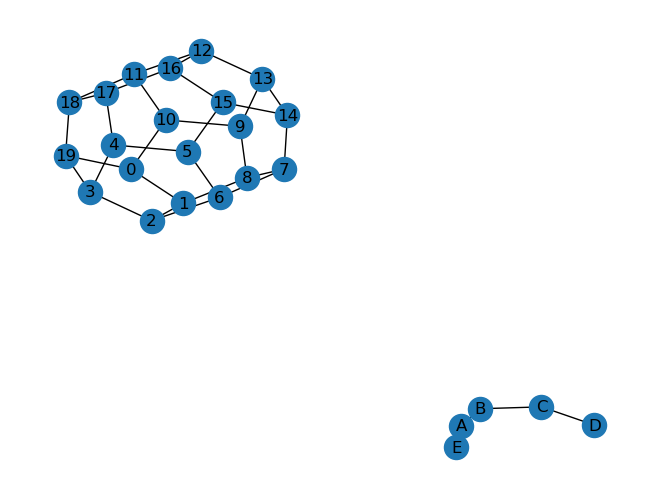

In [68]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()


## **Dirección en los grafos**

Además, podemos especializar los grafos asociando la direccionalidad a las aristas (dirigidas, no dirigidas).

![](../Images/edge_dir.png)

Las aristas pueden ser dirigidas, donde una arista e  tiene un nodo origen, $v_{src}$ y un nodo de destino $v_{dst}$ . En este caso, hay flujos de $v_{src}$  a $v_{dst}$.

También pueden ser no dirigidas, donde no hay noción de nodos de origen o destino, y hay flujo en ambas direcciones. Obsérvese que tener una sola arista no dirigida equivale a tener una arista dirigida desde $v_{src}$  a $v_{dst}$ y otra arista dirigida desde $v_{dst}$ a $v_{src}$

![](../Images/grafo_digrafo.png)

### **1. Grafos No Dirigidos**
Estos son grafos donde las aristas no tienen una dirección. Es decir, si existe una arista entre los nodos A y B, entonces esa arista se puede recorrer en ambos sentidos.

**Código de ejemplo:**


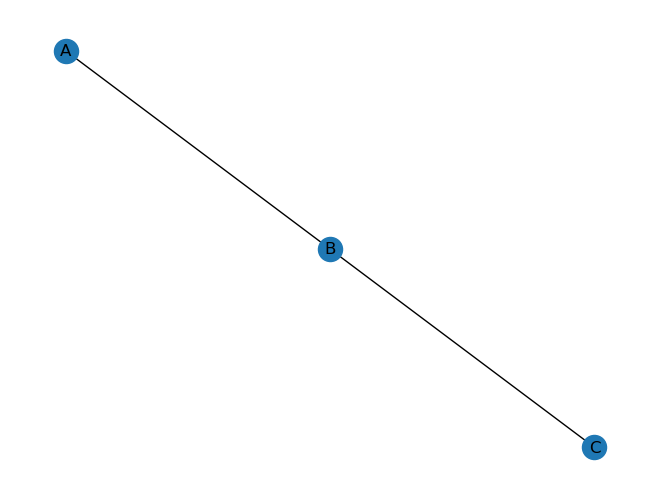

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G_undirected = nx.Graph()
G_undirected.add_edge('A', 'B')
G_undirected.add_edge('B', 'C')

nx.draw(G_undirected, with_labels=True)
plt.show()


### **2. Grafos Dirigidos (digrafos)**
A diferencia de los grafos no dirigidos, en un grafo dirigido, cada arista tiene una dirección definida. Es decir, si existe una arista dirigida de A hacia B, no necesariamente existe una arista de B hacia A.


**Código de ejemplo:**

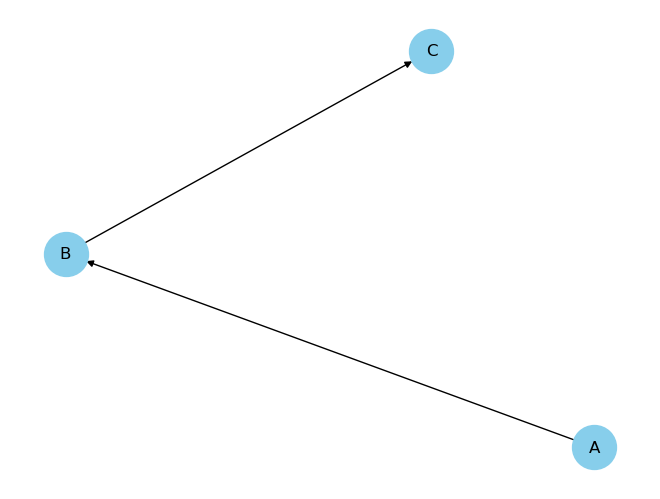

In [2]:
G_directed = nx.DiGraph()
G_directed.add_edge('A', 'B')
G_directed.add_edge('B', 'C')

nx.draw(G_directed, with_labels=True, node_size=1000, node_color="skyblue", pos=nx.spring_layout(G_directed))
plt.show()


### 3. **Multigrafos**


Un multigrafo es una generalización del concepto de grafo en la teoría de grafos. En un multigrafo, se permite más de una arista (llamada múltiples aristas) entre cualquier par de nodos. Estas múltiples aristas pueden ser dirigidas o no dirigidas.

Los multigrafos son útiles en situaciones donde es necesario modelar relaciones que pueden tener múltiples instancias entre entidades. Por ejemplo, si estás modelando un sistema de transporte donde hay múltiples rutas (representadas por aristas) entre dos ciudades (representadas por vértices), un multigrafo sería una herramienta apropiada para representar esta estructura.

**Código de ejemplo para un multigrafo no dirigido:**

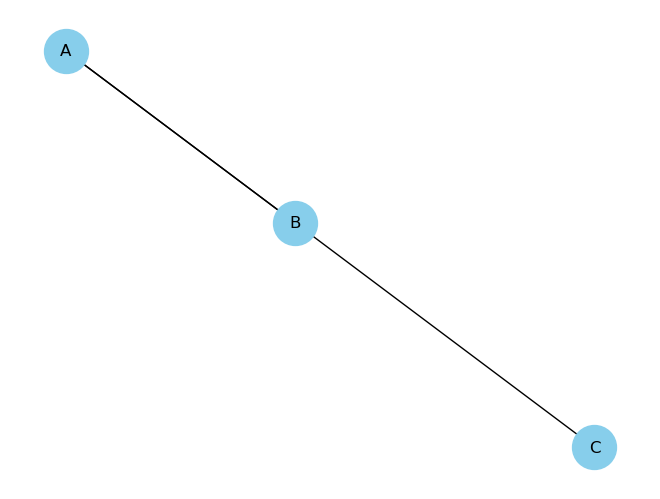

In [3]:
G_multigraph = nx.MultiGraph()
G_multigraph.add_edge('A', 'B')
G_multigraph.add_edge('A', 'B')
G_multigraph.add_edge('B', 'C')

nx.draw(G_multigraph, with_labels=True, node_size=1000, node_color="skyblue", pos=nx.spring_layout(G_multigraph))
plt.show()


**Código de ejemplo para un multigrafo dirigido:**


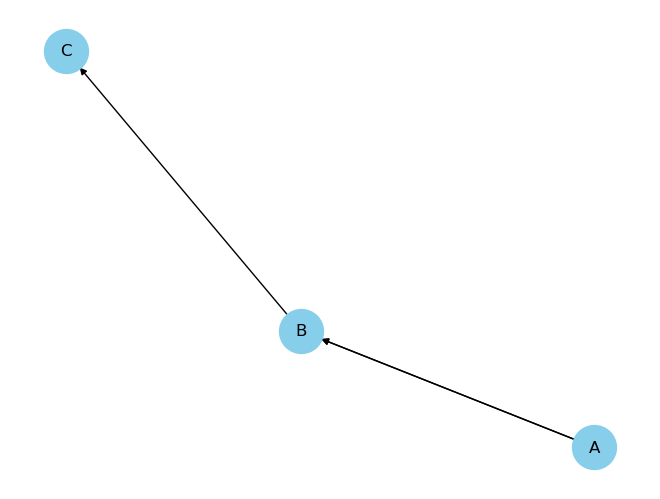

In [4]:
G_multidigraph = nx.MultiDiGraph()
G_multidigraph.add_edge('A', 'B')
G_multidigraph.add_edge('A', 'B')
G_multidigraph.add_edge('B', 'C')

nx.draw(G_multidigraph, with_labels=True, node_size=1000, node_color="skyblue", pos=nx.spring_layout(G_multidigraph))
plt.show()

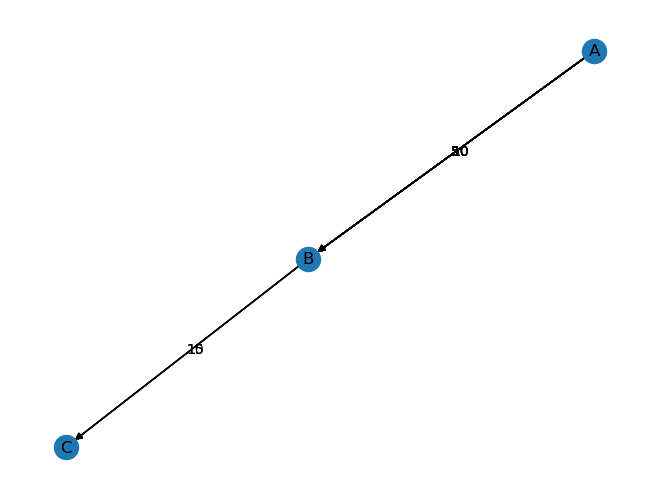

In [10]:
# Añadir aristas con diferentes pesos entre los nodos A y B
G_multidigraph.add_edge('A', 'B', weight=5)
G_multidigraph.add_edge('A', 'B', weight=10)
G_multidigraph.add_edge('B', 'C', weight=15)

# Dibujar el multigrafo
pos = nx.spring_layout(G_multidigraph)
nx.draw(G_multidigraph, pos, with_labels=True)


# Dibujar etiquetas de las aristas
for (u, v, key, data) in G_multidigraph.edges(keys=True, data=True):
    label = data.get('weight')
    if label:  # Solo mostramos la etiqueta si el atributo 'weight' existe
        # Calculemos una posición para las etiquetas basada en la posición de los nodos
        x = (pos[u][0] + pos[v][0]) / 2
        y = (pos[u][1] + pos[v][1]) / 2
        plt.text(x, y, label)

plt.show()

El método `nx.draw()` proporciona una manera sencilla de visualizar grafos. En los ejemplos anteriores, utilizamos diferentes argumentos para personalizar el aspecto del grafo. Si deseas más opciones de visualización, te recomiendo investigar sobre herramientas más avanzadas como `pyplot` de `matplotlib`, con las cuales puedes lograr visualizaciones más detalladas y atractivas.

### **Nodos y Grafos Conectados**

**Definición**: Un grafo se considera **conectado** si existe un camino entre cualquier par de nodos del grafo. Si el grafo no es conectado, se divide en componentes conectados.

Un **componente conectado** es un subconjunto del grafo en el que existe un camino entre cualquier par de nodos, y no está conectado a ningún nodo adicional del grafo.

![](../Images/conectivity.png)


1. **Crear un grafo simple y verificar si es conectado**


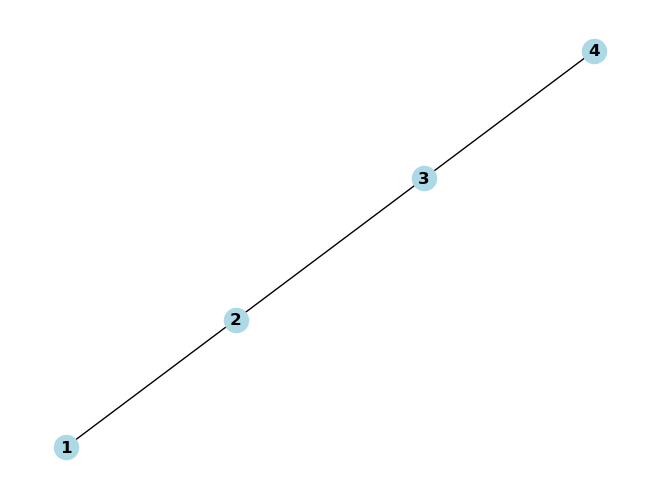

El grafo es conectado: True


In [32]:
import matplotlib.pyplot as plt


# Crear un grafo
G = nx.Graph()


# Añadir nodos y aristas
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Visualizar el grafo
nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue')
plt.show()

# Verificar si el grafo es conectado
is_connected = nx.is_connected(G)
print(f"El grafo es conectado: {is_connected}")


2. **Identificar componentes conectados en un grafo no conectado**


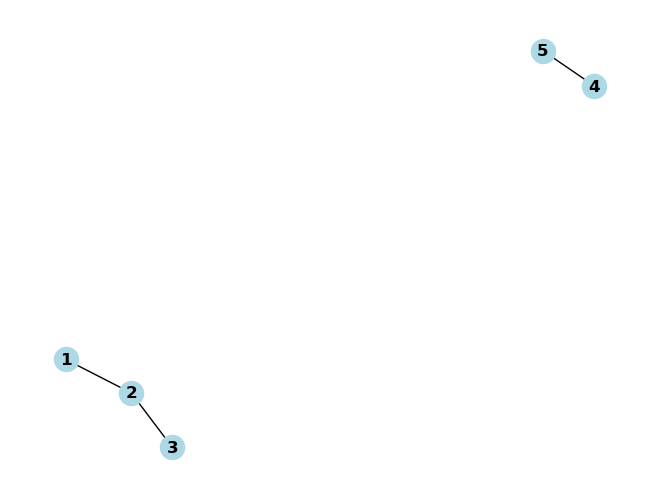

Componentes conectados: [{1, 2, 3}, {4, 5}]


In [33]:
# Crear un grafo no conectado
H = nx.Graph()
H.add_edges_from([(1, 2), (2, 3), (4, 5)])

# Visualizar el grafo
nx.draw(H, with_labels=True, font_weight='bold', node_color='lightblue')
plt.show()

# Identificar componentes conectados
components = list(nx.connected_components(H))
print(f"Componentes conectados: {components}")


3. **Extraer un componente conectado específico**


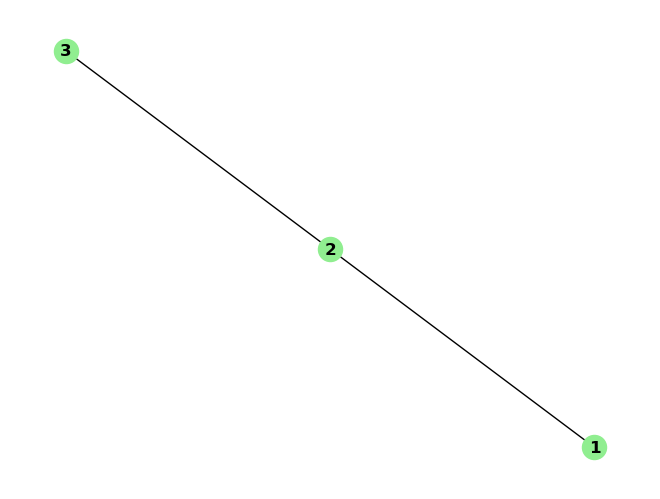

In [34]:
# Extraer el primer componente conectado del grafo H
subgraph = H.subgraph(components[0])

# Visualizar el subgrafo
nx.draw(subgraph, with_labels=True, font_weight='bold', node_color='lightgreen')
plt.show()

- Puede convertir un grafo a no dirigido con el método ``to_undirected``. Esto devuelve un nuevo objeto de grafo con los mismos nodos y aristas, pero con todas las aristas dirigidas convertidas en no dirigidas. El grafo original no se modifica.

- Puede convertir un grafo a dirigido con el método ``to_directed``. Esto devuelve un nuevo objeto de grafo con los mismos nodos y aristas, pero con todas las aristas no dirigidas convertidas en dirigidas. El grafo original no se modifica.


### **Ciclos, Rutas y Caminos en Grafos**

Un grafo puede representar relaciones complejas entre entidades, y uno de los aspectos más intrigantes del estudio de grafos es el análisis de los caminos y ciclos dentro de ellos.

#### Definiciones básicas:

1. **Ciclo:** Es un camino que comienza y termina en el mismo nodo y no repite aristas o nodos (excepto el nodo inicial y final).

2. **Camino:** Es una secuencia de nodos en la que cada nodo adyacente en la secuencia está conectado por una arista.

3. **Ruta:** Es un camino que no tiene aristas o nodos repetidos.

#### Grafos No Dirigidos vs. Grafos Dirigidos

- En un **grafo no dirigido**, la dirección de las aristas no importa. Si existe una arista entre los nodos A y B, podemos ir de A a B o de B a A.
  
- En un **grafo dirigido**, las aristas tienen una dirección. Si hay una arista dirigida de A a B, sólo se puede ir de A a B, y no al revés, a menos que haya otra arista dirigida en esa dirección.

#### Ciclos Especiales:

1. **Ciclo Hamiltoniano:** Es un ciclo que visita cada nodo del grafo exactamente una vez.
  
2. **Ciclo Euleriano:** Es un ciclo que visita cada arista del grafo exactamente una vez.


En términos generales:

- **Para que un grafo no dirigido tenga un ciclo Euleriano**, todos sus nodos deben tener un *grado* par.
  
- **Para que un grafo dirigido tenga un ciclo Euleriano**, debe ser fuertemente conexo y cada nodo debe tener el mismo *grado* de entrada y salida.

Los ciclos Hamiltonianos y Eulerianos son esenciales en diversas áreas, desde la teoría de grafos hasta la optimización, pasando por aplicaciones prácticas como la planificación de rutas.



![](../Images/Ruta_ciclo.png)

1. **Buscar un camino entre dos nodos:**


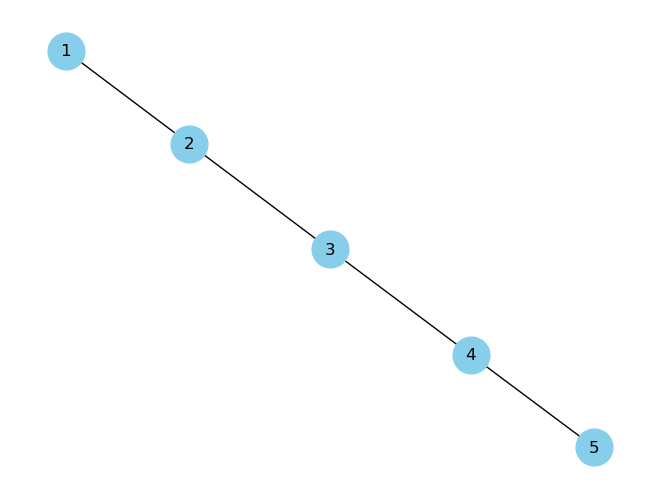

Camino más corto entre 1 y 5: [1, 2, 3, 4, 5]


In [18]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Visualizar
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.show()

path = nx.shortest_path(G, source=1, target=5)
print(f"Camino más corto entre 1 y 5: {path}")


    **Encuentra todos los caminos entre dos nodos:**

In [90]:
all_paths = list(nx.all_simple_paths(G, source=1, target=5))
print(f"Todos los caminos entre 1 y 5: {all_paths}")


Todos los caminos entre 1 y 5: [[1, 2, 3, 4, 5]]



2. **Detectar ciclos en un digrafo:**


El método `simple_cycles` es específico para grafos dirigidos (`DiGraph`) y encuentra ciclos simples, que son ciclos donde no se repiten nodos ni aristas, excepto el nodo inicial y final.


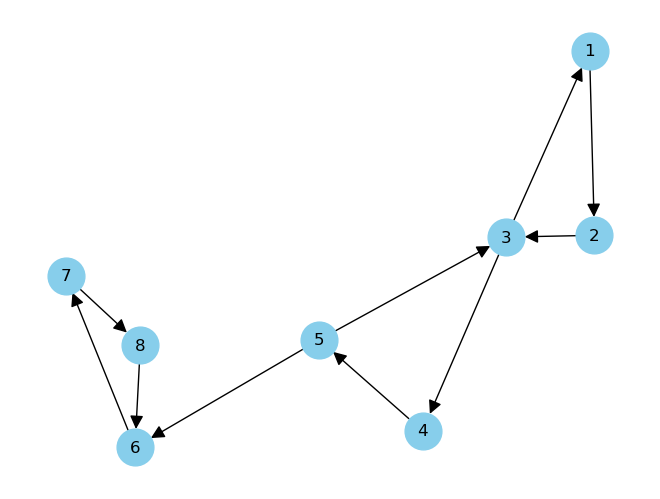

Ciclos simples en el grafo: [[1, 2, 3], [3, 4, 5], [8, 6, 7]]


In [12]:
G_directed = nx.DiGraph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 3), (5, 6), (6, 7), (7, 8), (8, 6)])

# Visualizar
nx.draw(G_directed, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.show()
cycles = list(nx.simple_cycles(G_directed))
print(f"Ciclos simples en el grafo: {cycles}")

In [15]:
all_paths_2 = list(nx.all_simple_paths(G_directed, source=3, target=5))
print(f"Todos los caminos entre 1 y 5: {all_paths_2}")

Todos los caminos entre 1 y 5: [[3, 4, 5]]


    **Detecta la presencia de al menos un ciclo en un grafo:**

In [16]:
try:
    cycle = nx.find_cycle(G_directed, orientation='original')
    print("El grafo tiene al menos un ciclo.")
except nx.NetworkXNoCycle:
    print("El grafo no tiene ciclos.")


El grafo tiene al menos un ciclo.


**Encuentra un ciclo en un grafo no dirigido:**

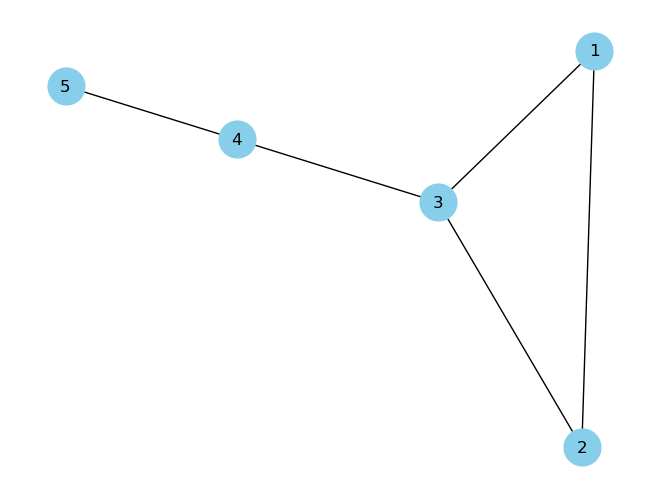

Un ciclo en el grafo: [(1, 2), (2, 3), (3, 1)]


In [19]:
# Añadir un ciclo manualmente
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Visualizar
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.show()

# Ahora intenta encontrar un ciclo
try:
    cycle = nx.find_cycle(G)
    print(f"Un ciclo en el grafo: {cycle}")
except nx.NetworkXNoCycle:
    print("El grafo no tiene ciclos.")


 ### 3. Uso Avanzado - Ciclos Especiales

**Encuentra un ciclo Euleriano (si existe):**

Como ya se mencionó, un ciclo euleriano recorre cada arista exactamente una vez. 

In [20]:
if nx.is_eulerian(G_directed):
    eulerian_cycle = list(nx.eulerian_circuit(G_directed))
    print(f"Ciclo Euleriano: {eulerian_cycle}")
else:
    print("El grafo no tiene un ciclo Euleriano.")

El grafo no tiene un ciclo Euleriano.


Lamentablemente, NetworkX no tiene una función incorporada para encontrar ciclos hamiltonianos directamente debido a la complejidad computacional del problema.


---

### Grado de un Grafo

El grado de un nodo en un grafo es una métrica fundamental que indica el número de aristas asociadas a ese nodo. Representa la conectividad local del nodo en el contexto del grafo.

#### Grado en Grafos No Dirigidos

En un **grafo no dirigido**, el grado de un nodo $v$, denotado como $\deg(v)$, es simplemente el número de aristas que se conectan a $v$.

Por ejemplo, en un grafo que contiene una arista entre los nodos $A$ y $B$, ambos nodos tienen un grado de 1.

---

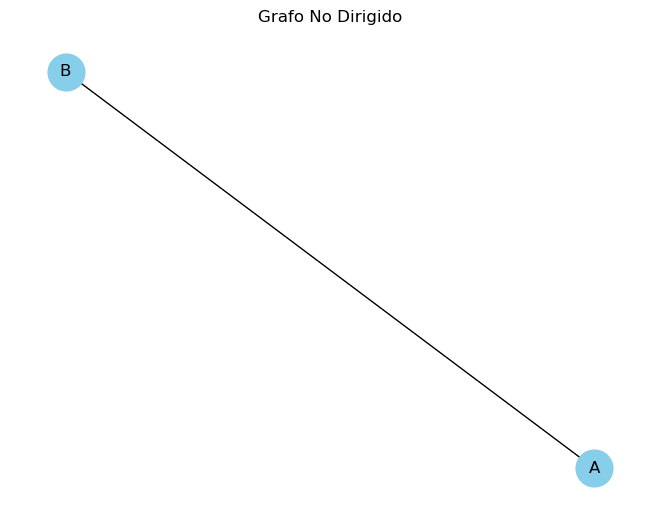

Grado del nodo A: 1


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G_undirected = nx.Graph()
G_undirected.add_edge("A", "B")

nx.draw(G_undirected, with_labels=True, node_size=700, node_color="skyblue")
plt.title("Grafo No Dirigido")
plt.show()

print(f"Grado del nodo A: {G_undirected.degree('A')}")


---

#### Grado en Grafos Dirigidos

En un **grafo dirigido** o **dígrafo**, es necesario distinguir entre las conexiones entrantes y salientes. Por ello, definimos dos tipos de grados:

1. **Grado de entrada (In-degree)**: Es el número de aristas dirigidas hacia el nodo.
2. **Grado de salida (Out-degree)**: Es el número de aristas que salen del nodo.

El grado total de un nodo sería la suma de su grado de entrada y su grado de salida.

---

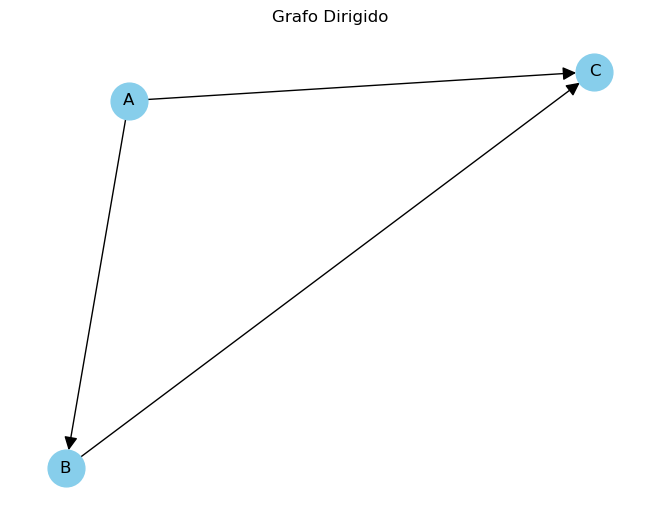

Grado de entrada del nodo A: 0
Grado de salida del nodo A: 2


In [84]:
G_directed = nx.DiGraph()
G_directed.add_edges_from([("A", "B"), ("B", "C"), ("A", "C")])

nx.draw(G_directed, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.title("Grafo Dirigido")
plt.show()

print(f"Grado de entrada del nodo A: {G_directed.in_degree('A')}")
print(f"Grado de salida del nodo A: {G_directed.out_degree('A')}")

---

#### Importancia del Grado en el Análisis de Redes

El grado de un nodo es fundamental en el análisis de redes porque:

1. **Indica popularidad o centralidad**: En redes sociales, un nodo (usuario) con un grado alto podría ser un influenciador o una figura central en la red.
2. **Ayuda en la detección de patrones**: Por ejemplo, en estudios epidemiológicos, los nodos de alto grado podrían ser puntos críticos para la propagación de enfermedades.
3. **Determina la robustez de una red**: Nodos de alto grado en una red de comunicaciones indican puntos de posible fallo o cuellos de botella.

---


### Topologías en Grafos

Una topología de red describe cómo diferentes nodos o dispositivos en una red están conectados entre sí. A continuación, discutiremos dos topologías comunes: radial y mallada, y cómo podemos identificarlas utilizando propiedades de los grafos.

#### Topología Radial (Star o Estrella)

**Definición:** En esta topología, tenemos un nodo central al que todos los demás nodos están conectados directamente. El nodo central actúa como un repetidor y todas las comunicaciones que pasan por la red deben pasar por el nodo central.

**Propiedades del Grafo:** 
- Existe un nodo (central) cuya grado (número de bordes conectados) es igual al número total de nodos menos uno.
- Todos los demás nodos tienen grado 1 y están conectados solo al nodo central.



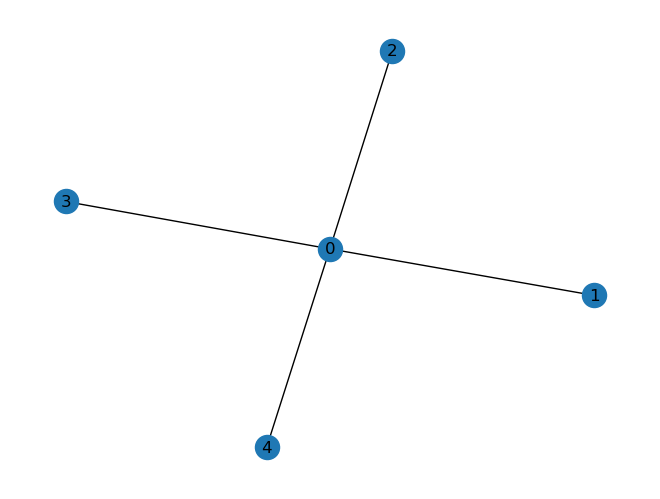

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

G_star = nx.star_graph(4)
nx.draw(G_star, with_labels=True)
plt.show()

**Identificación usando NetworkX:**


In [70]:
def is_star_topology(G):
    central_nodes = [node for node, degree in G.degree() if degree == len(G.nodes()) - 1]
    return len(central_nodes) == 1

In [72]:
# Verificando la topología radial
if is_star_topology(G_star):
    print("G_star tiene una topología radial.")
else:
    print("G_star no tiene una topología radial.")

G_star tiene una topología radial.


**Cuando el grafo es dirigido**

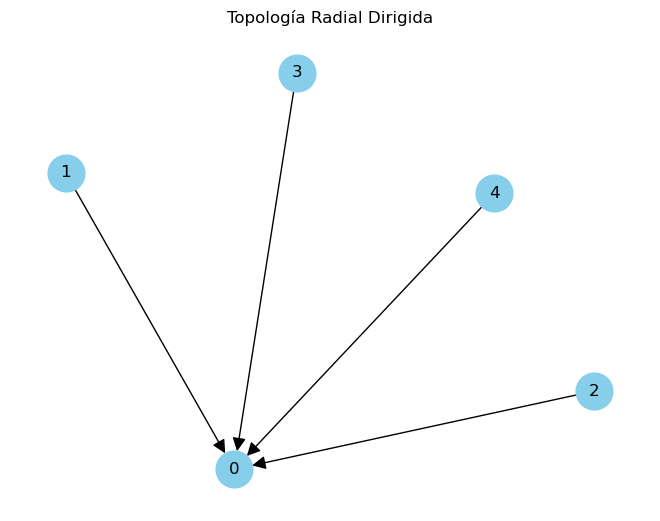

In [80]:
G_star_directed = nx.DiGraph()
G_star_directed.add_edges_from([(i, 0) for i in range(1, 5)])

nx.draw(G_star_directed, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.title("Topología Radial Dirigida")
plt.show()


#### Topología Mallada (Mesh)

**Definición:** En una topología mallada, cada nodo está conectado a todos los demás nodos. Es robusta y ofrece alta redundancia y fiabilidad.

**Propiedades del Grafo:**
- Todos los nodos tienen grado \( n - 1 \), donde \( n \) es el número total de nodos en el grafo.



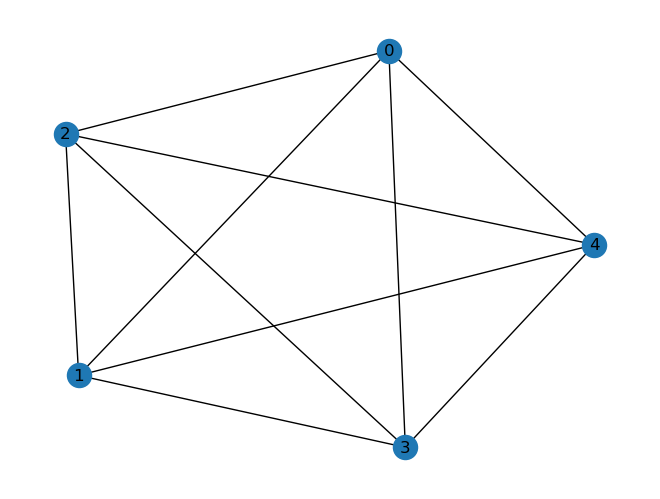

In [73]:
G_mesh = nx.complete_graph(5)
nx.draw(G_mesh, with_labels=True)
plt.show()


**Identificación usando NetworkX:**


In [74]:
def is_mesh_topology(G):
    return all(degree == len(G.nodes()) - 1 for _, degree in G.degree())

In [75]:
# Verificando la topología mallada
if is_mesh_topology(G_mesh):
    print("G_mesh tiene una topología mallada.")
else:
    print("G_mesh no tiene una topología mallada.")

G_mesh tiene una topología mallada.


**Cuando el grafo es dirigido**

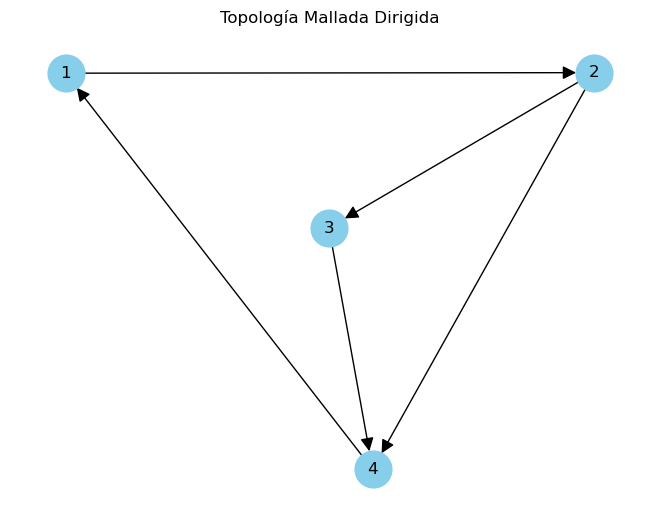

In [82]:
G_mesh_directed = nx.DiGraph([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

nx.draw(G_mesh_directed, with_labels=True, node_size=700, node_color="skyblue", arrowsize=20)
plt.title("Topología Mallada Dirigida")
plt.show()



### Identificación Usando las Propiedades

Las propiedades de los grafos nos permiten identificar rápidamente qué topología estamos observando. Por ejemplo, si notamos que un nodo tiene un grado significativamente más alto que los demás, es probable que estemos observando una topología radial. Si todos los nodos tienen el mismo grado y ese grado es \( n - 1 \), entonces estamos viendo una topología mallada.

Al comprender y aplicar estas propiedades, podemos diseñar y analizar redes de manera más eficiente, garantizando una comunicación efectiva y una arquitectura de red óptima.




## Árboles 

### Definición

Un **árbol** es un grafo no dirigido y conectado que no tiene ciclos. Tiene las siguientes propiedades:

- Cualquier conexión entre dos nodos es un camino único.
- Si se añade cualquier arista adicional al árbol, se crea un ciclo.
- Si se quita cualquier arista del árbol, el árbol se desconecta.

### Creación de un Árbol

Para crear un árbol en NetworkX, simplemente añade nodos y aristas asegurándote de no introducir ciclos.


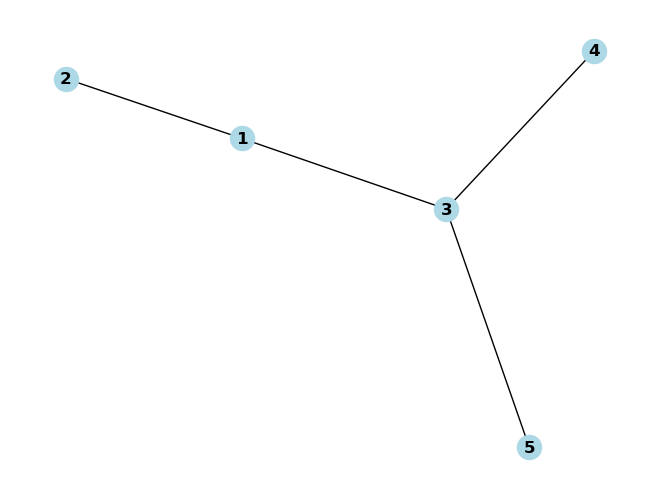

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

T = nx.Graph()
T.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5)])

nx.draw(T, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()


### Verificando si un Grafo es un Árbol

Para comprobar si un grafo es un árbol, debes asegurarte de que esté conectado y no tenga ciclos.


In [3]:
def is_tree(G):
    if G.is_directed():
        # Para grafos dirigidos: Es un árbol si es débilmente conectado y no tiene ciclos
        return nx.is_weakly_connected(G) and len(list(nx.simple_cycles(G))) == 0
    else:
        # Para grafos no dirigidos: Es un árbol si es conectado y el número de aristas es n - 1
        return nx.is_connected(G) and G.number_of_edges() == G.number_of_nodes() - 1

print(is_tree(T))
  # Esto debe devolver True si T es un árbol.

True



### Árboles completo

Un **árbol completo** de un grafo es un árbol compuesto por todos los vértices y algunas (posiblemente todas) de las aristas del grafo.


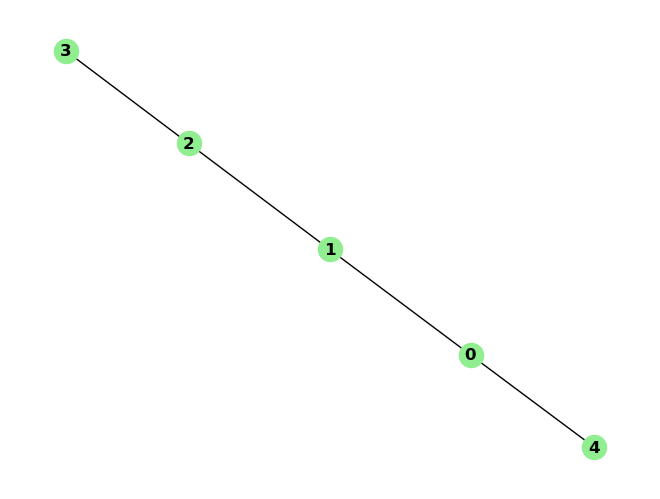

In [4]:
G = nx.cycle_graph(5)  # Esto crea un ciclo C5.
spanning_tree = nx.minimum_spanning_tree(G)  # Encuentra un árbol expandiendo mínimo.

nx.draw(spanning_tree, with_labels=True, node_color='lightgreen', font_weight='bold')
plt.show()


### Árboles Dirigidos (Arborescencias)

Un árbol dirigido es una estructura jerárquica donde hay un nodo raíz y cada nodo, excepto la raíz, tiene exactamente un nodo predecesor.


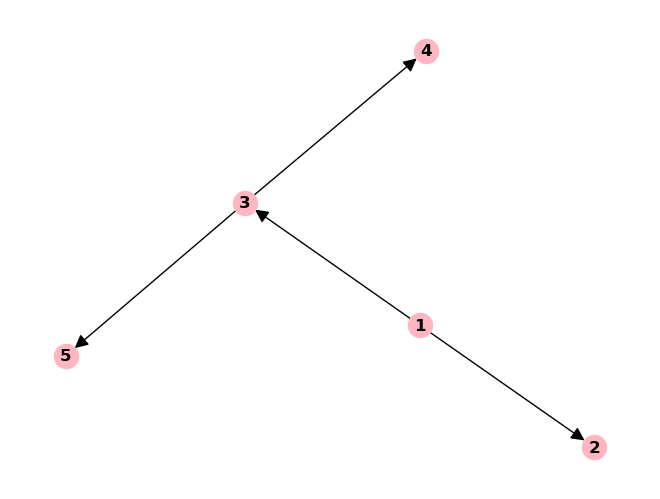

In [5]:
D = nx.DiGraph()
D.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5)])

nx.draw(D, with_labels=True, node_color='lightpink', font_weight='bold', arrowsize=20)
plt.show()



# Guías NX

Es altamentes recomendable consultar la guía [nx-guides](https://networkx.org/nx-guides/index.html). Allí encontrarás tutoriales de aplicaciones reales y exámenes en profundidad de grafos y algoritmos de redes. Todo el material es oficial y ha sido desarrollado por la comunidad NetworkX.


